In [1]:
# Import the relevant modules
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
from math import pi
import trackpy
from iris.time import PartialDateTime
import tobac
import warnings

In [2]:
# Import the libraries
import functions
import dictionaries

In [3]:
# Set up the warning messages
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [4]:
# Load the olr and precip data
olr, time_olr, datetimes_olr, con_olr = functions.load_olr_data(dictionaries.data_file)

# Load the precip data
precip, time_precip, datetimes_precip, con_precip = functions.load_precip_data(dictionaries.precip)

In [5]:
# Set up the directory to save the data
savedir, plot_dir = functions.setup_directories()

In [6]:
# Extract longitude and latitude
longitude,latitude=np.meshgrid(olr.coord('longitude').points,olr.coord('latitude').points)

# Calculate dxy
dxy, dt = functions.calculate_dxy(longitude, latitude, olr)

In [7]:
#sigma = dictionaries.sigma

#tf = (olr.data/sigma)**(0.25)
#tb_var = (-dictionaries.a + np.sqrt(dictionaries.a**2 + 4*dictionaries.b*tf.data))/(2*dictionaries.b)

In [8]:
# Calculate brightness temperatures
tf, tb_var, tb = functions.calculate_temperatures(dictionaries.a, dictionaries.b, dictionaries.sigma, olr)

In [9]:
# Set up the parameters dictionaries
# features parameters
parameters_features = functions.setup_parameters_features(dictionaries.position_threshold, dictionaries.sigma_threshold, dictionaries.target, dictionaries.threshold, dictionaries.n_min_threshold)

# segmentation parameters
parameters_segmentation = functions.setup_parameters_segmentation(dictionaries.target, dictionaries.method, dictionaries.threshold)

# linking parameters
parameters_linking = functions.setup_parameters_linking(dictionaries.n_min_threshold, dictionaries.stubs, dictionaries.order, dictionaries.extrapolate, dictionaries.memory, dictionaries.adaptive_stop, dictionaries.adaptive_step, dictionaries.subnetwork_size, dictionaries.method_linking)

In [10]:
# Now perform the sensitivity analysis
print("Values of threshold to be tested: ", dictionaries.threshold_values)
threshold_values=dictionaries.threshold_values

# Call the sensitivity analysis function
functions.perform_sensitivity_analysis(tb, savedir, parameters_features, parameters_segmentation, parameters_linking, threshold_values)

Frame 743: 12 trajectories present.
[15.8910629  16.3200115  10.79277028 14.83040962 16.57153389 13.5421877
 18.629464   15.73701019 13.41235778 14.65808433 20.27598658  6.9540637
 10.78868349 11.39262693 14.60124717  9.04622438  7.8350198  13.5790463
  9.55076696 17.91599987 21.31774586 29.79432024 11.72787244 15.49235008
 12.00577081  9.98750919 23.43647966  3.66263823 12.91760197 12.23948473
 14.95605874 18.01562992 11.95645761  4.37201867  5.67572975 13.28776435
 24.30974994 19.7570612  13.70513177 14.06283808 22.40068195 21.13753538
 11.2990579  20.50593712 20.6563996  16.84534429 10.76370001 15.76628321
 15.73533862 12.34957164 23.90378133 20.07796332 15.71352198 11.48354405
 10.79814387  3.44575161 18.39204748 16.52487988  3.75972837 19.04562009
 15.97173591 14.16503406 18.18148378 16.88150623 10.58546933 11.88094397
 16.1117958  15.17915001  7.52605756 24.12558241 16.78590736 22.83162071
 11.9086838  10.01330626  7.82535115 13.1199883   8.52853623 20.1536053
  4.92706917  3.811

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,6315,163754.107087,9.935710e+05,48568.178571,294,10.574830,55.0,6.0,13.885790,29.597066,3.138824,225
1,7499,193844.092484,1.756938e+06,44347.500000,323,10.975232,76.0,6.0,14.266194,33.649297,3.102745,230
2,8359,211233.356662,1.985445e+06,46172.892857,387,10.503876,124.0,6.0,14.057281,35.314732,2.575517,235
3,9081,239005.136592,2.414115e+06,49594.781250,391,11.406650,75.0,6.0,13.899972,35.024294,2.882871,240
4,9122,253137.636622,2.543058e+06,44069.785714,405,11.237037,79.0,6.0,14.220544,34.329685,2.678585,241
5,9192,290385.933610,3.064564e+06,47355.750000,381,11.761155,75.0,6.0,14.072208,31.651516,2.123047,245


In [11]:
df = pd.read_csv('Save/Jan_2005/singleTb/sensitivity_analysis_singleTbThreshold.csv')

In [12]:
df

,num_features,mean_area,max_area,min_area,num_tracks,mean_lifetime,max_lifetime,min_lifetime,mean_velocity,max_velocity,min_velocity,threshold
0,6315,163754.107087,9.935710e+05,48568.178571,294,10.574830,55.0,6.0,13.885790,29.597066,3.138824,225
1,7499,193844.092484,1.756938e+06,44347.500000,323,10.975232,76.0,6.0,14.266194,33.649297,3.102745,230
2,8359,211233.356662,1.985445e+06,46172.892857,387,10.503876,124.0,6.0,14.057281,35.314732,2.575517,235
3,9081,239005.136592,2.414115e+06,49594.781250,391,11.406650,75.0,6.0,13.899972,35.024294,2.882871,240
4,9122,253137.636622,2.543058e+06,44069.785714,405,11.237037,79.0,6.0,14.220544,34.329685,2.678585,241
5,9192,290385.933610,3.064564e+06,47355.750000,381,11.761155,75.0,6.0,14.072208,31.651516,2.123047,245


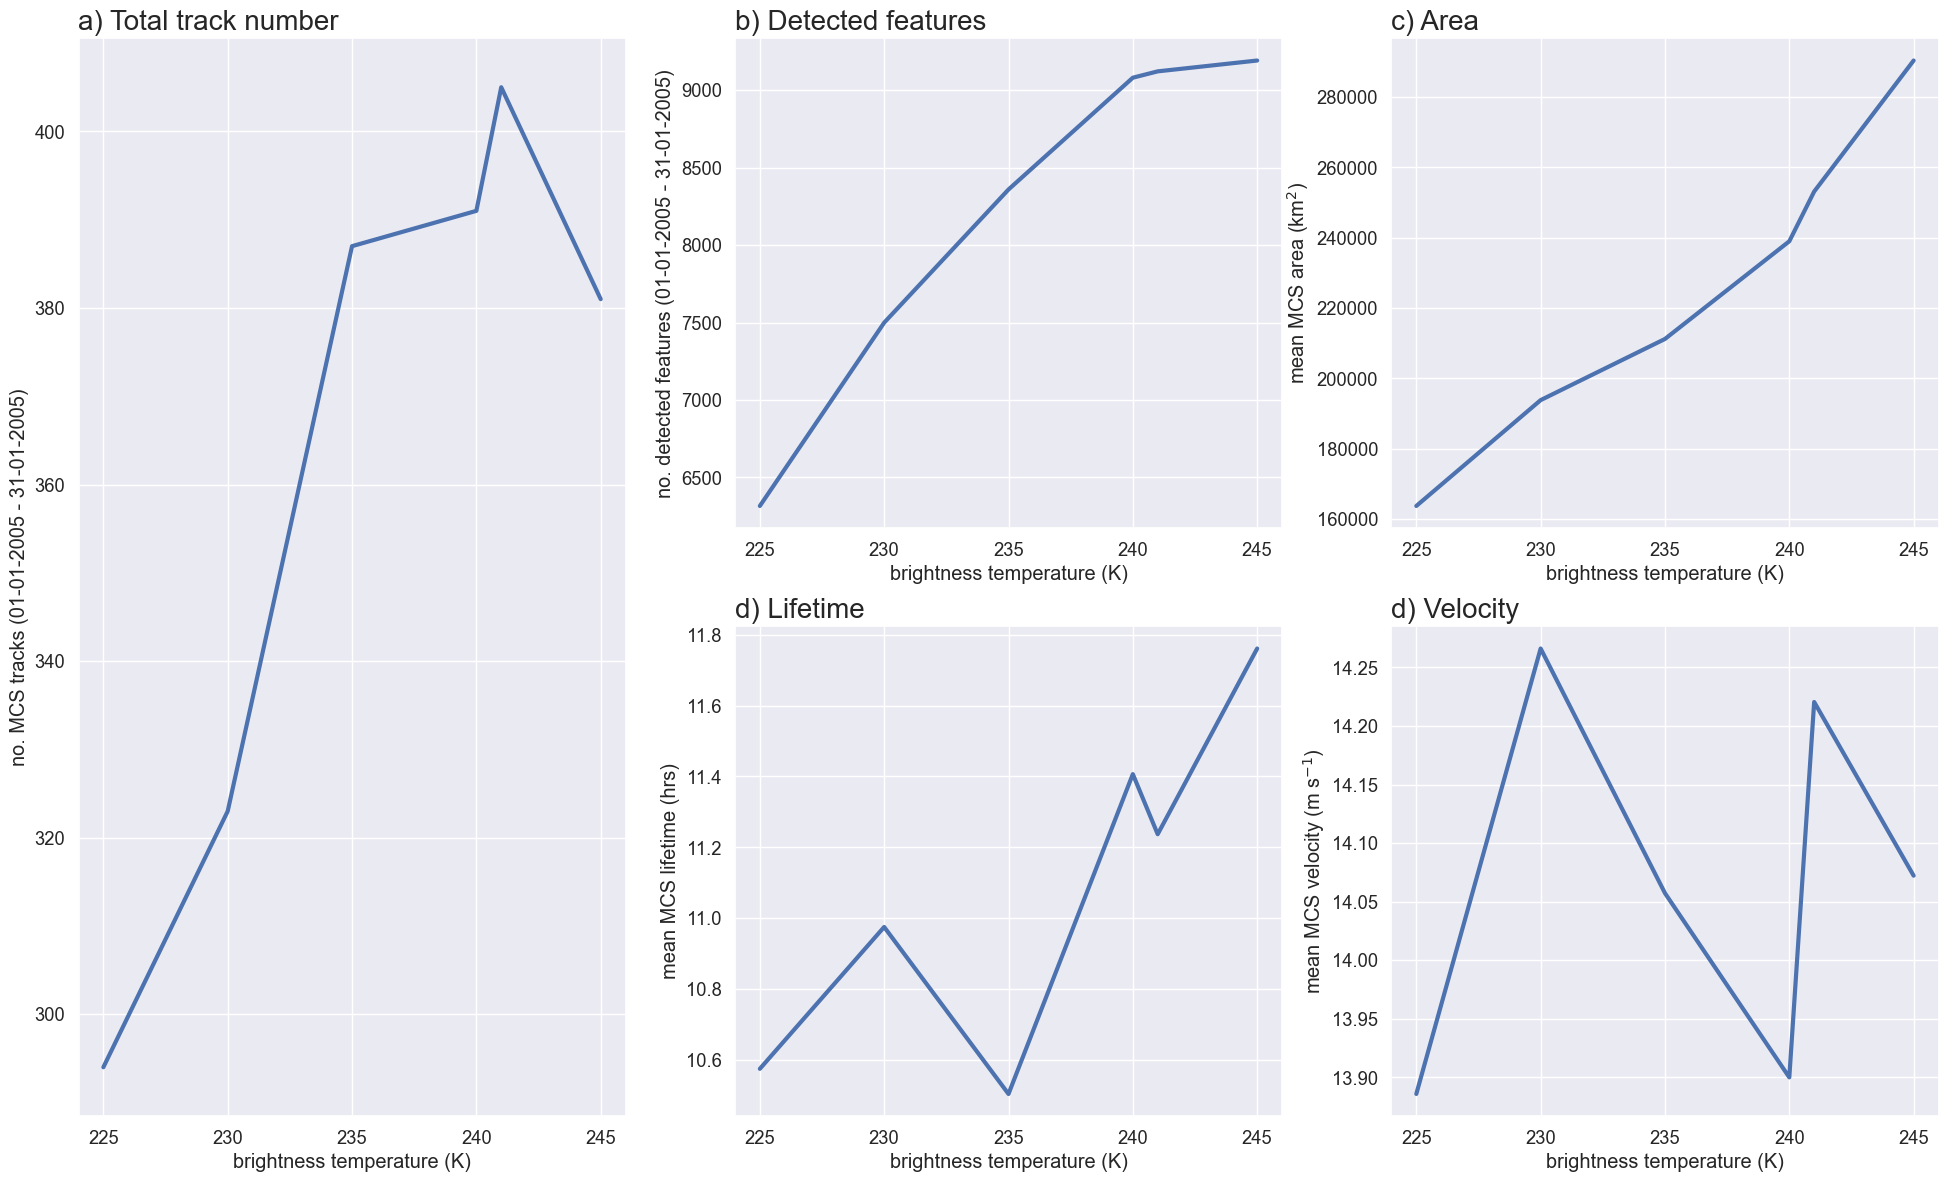

In [13]:
#plot of single Tb sensitivity analysis for MCSs
import seaborn as sns 
sns.set(font_scale=1.2)

plt.figure(figsize=(24,14))
f= 20
lf= 15

xticks=[225,230,235,240,245]
ax1=plt.subplot(2,3,(1,4))
ax1.set_title('a) Total track number ', loc='left', fontsize= f )
ax1.plot(df['threshold'],df['num_tracks'],linewidth=3)
ax1.set_xticks(xticks)
ax1.set_ylabel('no. MCS tracks (01-01-2005 - 31-01-2005)')
ax1.set_xlabel('brightness temperature (K)')

ax2=plt.subplot(2,3,2)
ax2.set_title('b) Detected features ', loc='left', fontsize= f )
ax2.plot(df['threshold'],df['num_features'],linewidth=3)
ax2.set_xticks(xticks)
ax2.set_ylabel('no. detected features (01-01-2005 - 31-01-2005)')
ax2.set_xlabel('brightness temperature (K)')

ax3=plt.subplot(2,3,3)
ax3.set_title('c) Area ', loc='left', fontsize= f )
ax3.plot(df['threshold'],df['mean_area'],linewidth=3)
ax3.set_xticks(xticks)
ax3.set_ylabel('mean MCS area (km$^{2}$)')
ax3.set_xlabel('brightness temperature (K)')

ax4=plt.subplot(2,3,5)
ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
ax4.plot(df['threshold'],df['mean_lifetime'],linewidth=3)
ax4.set_xticks(xticks)
ax4.set_ylabel('mean MCS lifetime (hrs)')
ax4.set_xlabel('brightness temperature (K)')

ax5=plt.subplot(2,3,6)
ax5.set_title('d) Velocity ', loc='left', fontsize= f )
ax5.plot(df['threshold'],df['mean_velocity'],linewidth=3)
ax5.set_xticks(xticks)
ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
ax5.set_xlabel('brightness temperature (K)')

plt.savefig('Plot/Jan_2005/singleTb/single_tb_analysis.png')


In [14]:
# #plot of nminthreshold sensitivity analysis for MCSs
# import seaborn as sns 
# sns.set(font_scale=1.2)

# plt.figure(figsize=(24,14))
# f= 20
# lf= 15

# xticks=[118,987,1481,1975,2469]
# ax1=plt.subplot(2,3,(1,4))
# ax1.set_title('a) Total track number ', loc='left', fontsize= f )
# ax1.plot(df['n_min_threshold'],df['num_tracks'],linewidth=3)
# ax1.set_xticks(xticks)
# ax1.set_ylabel('no. MCS tracks (01-01-2005 - 31-01-2005)')
# ax1.set_xlabel('minimum area threshold (km$^{2}$)')

# ax2=plt.subplot(2,3,2)
# ax2.set_title('b) Detected features ', loc='left', fontsize= f )
# ax2.plot(df['n_min_threshold'],df['num_features'],linewidth=3)
# ax2.set_xticks(xticks)
# ax2.set_ylabel('no. detected features (01-01-2005 - 31-01-2005)')
# ax2.set_xlabel('minimum area threshold (km$^{2}$)')

# ax3=plt.subplot(2,3,3)
# ax3.set_title('c) Area ', loc='left', fontsize= f )
# ax3.plot(df['n_min_threshold'],df['mean_area'],linewidth=3)
# ax3.set_xticks(xticks)
# ax3.set_ylabel('mean MCS area (km$^{2}$)')
# ax3.set_xlabel('minimum area threshold (km$^{2}$)')

# ax4=plt.subplot(2,3,5)
# ax4.set_title('d) Lifetime ', loc='left', fontsize= f )
# ax4.plot(df['n_min_threshold'],df['mean_lifetime'],linewidth=3)
# ax4.set_xticks(xticks)
# ax4.set_ylabel('mean MCS lifetime (hrs)')
# ax4.set_xlabel('minimum area threshold (km$^{2}$)')

# ax5=plt.subplot(2,3,6)
# ax5.set_title('d) Velocity ', loc='left', fontsize= f )
# ax5.plot(df['n_min_threshold'],df['mean_velocity'],linewidth=3)
# ax5.set_xticks(xticks)
# ax5.set_ylabel('mean MCS velocity (m s$^{-1}$)')
# ax5.set_xlabel('minimum area threshold (km$^{2}$)')

# plt.savefig('Plot/Jan_2005/nminthreshold/nminthreshold_analysis.png')
